<a href="https://colab.research.google.com/github/vifirsanova/OCR_Glossary/blob/main/workbook_gensim_phrases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек

In [1]:
# использование цвета для вывода на экран
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


UPD: новая версия Gensim

In [3]:
!pip install --pre --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


UPD: новая, совместимая версия Numpy 

In [4]:
!pip install numpy==1.24.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.1 which is incompatible.


UPD: добавили gensim ENGLISH_CONNECTOR_WORDS и simple_tokenize

In [5]:
from pathlib import Path

import re

from colorama import Fore, Style

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords

import spacy

from gensim.utils import simple_preprocess, simple_tokenize
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
from gensim.test.utils import datapath
from gensim.models.word2vec import Text8Corpus
from gensim.corpora import Dictionary

import numpy as np

import pandas as pd

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


# Загрузка нескольких файлов

* загружаем файлы из GitHub
* соединяем их в одной переменной

In [6]:
!wget https://raw.githubusercontent.com/vifirsanova/OCR_Glossary/main/Geology.txt
!wget https://raw.githubusercontent.com/vifirsanova/OCR_Glossary/main/Physical_Geology_2nd_Ed.txt
!wget https://raw.githubusercontent.com/vifirsanova/OCR_Glossary/main/Lumen-Learning-Geology.txt

# проверяем наличие загруженных файлов в директории
# с помощью консольной команды ls

!ls

--2023-02-07 06:03:09--  https://raw.githubusercontent.com/vifirsanova/OCR_Glossary/main/Geology.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 207953 (203K) [text/plain]
Saving to: ‘Geology.txt’

Geology.txt         100%[===================>] 203.08K  --.-KB/s    in 0.03s   

2023-02-07 06:03:09 (6.79 MB/s) - ‘Geology.txt’ saved [207953/207953]

--2023-02-07 06:03:10--  https://raw.githubusercontent.com/vifirsanova/OCR_Glossary/main/Physical_Geology_2nd_Ed.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1268676 (1.2M) [t

In [78]:
# прочитываем все файлы с помощью метода read_text из библиотеки Path
# мы можем выполнить это параллельно, 
# то есть за одну команду одновременно обработать несколько файлов

text0, text1, text2 = Path('Geology.txt').read_text(), Path('Lumen-Learning-Geology.txt').read_text(), Path('Physical_Geology_2nd_Ed.txt').read_text()

# посмотрим на часть одного из текстов

print(text2[:900])

https://opentextbc.ca/physicalgeology2ed/
Physical Geology - 2nd Edition
Physical Geology - 2nd Edition
Steven Earle
Karla Panchuk
BCcampus
Victoria, B.C.
Icon for the Creative Commons Attribution 4.0 International License

Physical Geology - 2nd Edition by Steven Earle is licensed under a Creative Commons Attribution 4.0 International License, except where otherwise noted.

© 2019 Steven Earle

The CC licence permits you to retain, reuse, copy, redistribute, and revise this book—in whole or in part—for free providing the author is attributed as follows:

Physical Geology – 2nd Edition by Steven Earle is used under a Creative Commons Attribution 4.0 International Licence.
If you redistribute all or part of this book, it is recommended the following statement be added to the copyright page so readers can access the original book at no cost:

Download for free from the B.C. Open Collection


Какие артефакты бросаются нам в глаза в этом тексте?

In [79]:
# объединим все файлы в один и посмотрим его статистику

text = " ".join([text0, text1, text2])

print(f'Статистическое описание сырого документа\n\n{Fore.RED}Длина документа:{Style.RESET_ALL} {len(text)} символов\n\
{Fore.RED}Приблизительное количество слов в документе:{Style.RESET_ALL} {len(text.split(" "))}')

Статистическое описание сырого документа

Длина документа: 2452019 символов
Приблизительное количество слов в документе: 375467


Какие статистические данные по сырому тексту нам могут быть интересны?

Как их получить?

# Предобработка данных

UPD: Разбиение текста по предложениям

In [72]:
# разбиваем текст на предложения по точке

split_text = text.split('.')

split_text

['SOURCE: https://opengeology',
 'org/textbook/1-understanding-science/\n====================\nI DO NOT OWN THE TEXT',
 ' THE TEXT IS BEING USED FOR NON-COMMERCIAL EDUCATIONAL PURPOSES',
 '\n---------------------\nAn Introduction to Geology\nFree Textbook for College-Level Introductory Geology Courses\n1 Understanding Science\nSTUDENT LEARNING OUTCOMES\nAt the end of this chapter, students should be able to:\nContrast objective versus subjective observations, and quantitative versus qualitative observations',
 '\nIdentify a pseudoscience based on its lack of falsifiability\nContrast the methods used by Aristotle and Galileo to describe the natural environment',
 '\nExplain the scientific method and apply it to a problem or question',
 '\nDescribe the foundations of modern geology, such as the principle of uniformitarianism',
 '\nContrast uniformitarianism with catastrophism',
 '\nExplain why studying geology is important',
 '\nIdentify how Earth materials are transformed by rock cycle 

In [73]:
# чистим получившийся список

sentences = [sentence for sentence in split_text if len(sentence) > 2]

sentences

['SOURCE: https://opengeology',
 'org/textbook/1-understanding-science/\n====================\nI DO NOT OWN THE TEXT',
 ' THE TEXT IS BEING USED FOR NON-COMMERCIAL EDUCATIONAL PURPOSES',
 '\n---------------------\nAn Introduction to Geology\nFree Textbook for College-Level Introductory Geology Courses\n1 Understanding Science\nSTUDENT LEARNING OUTCOMES\nAt the end of this chapter, students should be able to:\nContrast objective versus subjective observations, and quantitative versus qualitative observations',
 '\nIdentify a pseudoscience based on its lack of falsifiability\nContrast the methods used by Aristotle and Galileo to describe the natural environment',
 '\nExplain the scientific method and apply it to a problem or question',
 '\nDescribe the foundations of modern geology, such as the principle of uniformitarianism',
 '\nContrast uniformitarianism with catastrophism',
 '\nExplain why studying geology is important',
 '\nIdentify how Earth materials are transformed by rock cycle 

## Чистка данных с помощью RegEx

Вспомним отрывок одного из текстов:

```
https://opentextbc.ca/physicalgeology2ed/\nPhysical Geology - 2nd Edition\nPhysical Geology - 2nd Edition\nSteven Earle\nKarla Panchuk\nBCcampus\nVictoria, B.C.\nIcon for the Creative Commons Attribution 4.0 International License\n\nPhysical Geology - 2nd Edition by Steven Earle is licensed under a Creative Commons Attribution 4.0 International License, except where otherwise noted.\n\n© 2019 Steven Earle\n\nThe CC licence permits you to retain, reuse, copy, redistribute, and revise this book—in whole or in part—for free providing the author is attributed as follows:\n\nPhysical Geology – 2nd Edition by Steven Earle is used under a Creative Commons Attribution 4.0 International Licence.\nIf you redistribute all or part of this book, it is recommended the following statement be added to the copyright page so readers can access the original book at no cost:\n\nDownload for free from the B.C. Open Collection

```

Мы обратили внимание на некоторые артефакты:

* ссылки
* абзацные отступы
* специальные символы, например `©`
* ???

Проверим, верна ли наша гипотеза.




In [80]:
# ссылки

link_pattern = re.compile(r'https?://\S+|www\.\S+')
links = re.findall(link_pattern, text)

print(f'{Fore.RED}Количество обнаруженных ссылок:{Style.RESET_ALL} {len(links)}\n{Fore.RED}Образцы ссылок:{Style.RESET_ALL} {links[:3]}')

# специальные символы

symbol_pattern = re.compile(r'[^a-zA-Z0-9 .,:;…()!?\-—]+')
symbols = re.findall(symbol_pattern, text)

print(f'\n{Fore.RED}Количество обнаруженных специальных символов:{Style.RESET_ALL} {len(symbols)}\n{Fore.RED}Образцы уникальных символов:{Style.RESET_ALL} {set(symbols[500:1000])}')

# любые символы

any_symbol_pattern = re.compile(r'[^a-zA-Z ]+')
all_symbols = re.findall(any_symbol_pattern, text)

print(f'\n{Fore.RED}Количество обнаруженных символов:{Style.RESET_ALL} {len(all_symbols)}\n{Fore.RED}Образцы уникальных символов:{Style.RESET_ALL} {set(all_symbols[500:600])}')

Количество обнаруженных ссылок: 341
Образцы ссылок: ['https://opengeology.org/textbook/1-understanding-science/', 'https://www.columbiabasin.edu/.', 'http://www.ck12.org/book/CK-12-Earth-Science-For-Middle-School/section/1.2/.']

Количество обнаруженных специальных символов: 23382
Образцы уникальных символов: {'>', '[', '/', '–', '\n\n\n\n\n', 'í', '\n\n\n\n\n\n', '%', '”', '’', '&', "'", '\n', '°', 'ö', 'ʻ', '<', '•', '+', '°/', '“', '\n\n\n\n', '‘', ']', 'ᐧ', '·', '\n\n\n', 'ʻā'}

Количество обнаруженных символов: 76614
Образцы уникальных символов: {':', '\n', '.\n', ').\n', '-', '2.\n', '),', '(', '—', '.\n1.5.2', '.\n1.5.3', '’', ';', '.', ','}


Мы хотим проверить, какое влияние окажет удаление знаков препинания на результат работы нашей программы.

Для этого создадим три функции для чистки текста: 
- первая сохраняет знаки препинания и цифры
- вторая очищает текст от знаков препинания
- третья удаляет все символы кроме букв

In [83]:
def clean(text):
  ### сохраняет знаки препинания и цифры ###

  # удаляем из текста ссылки 
  text = re.sub('https?://\S+|www\.\S+', ' ', text)
  
  # удаляем специальные символы
  # оставляем знаки препинания и цифры
  text = re.sub('[^a-zA-Z0-9 .,:;…()!?\-—]+', ' ', text)

  # возвращаем текст, очищенный от лишних пробелов
  # которые появились в результате обработки
  return re.sub('\s+', ' ', text)

def full_clean(text):
  ### очищает текст от знаков препинания ###

  # удаляем из текста ссылки 
  text = re.sub('https?://\S+|www\.\S+', ' ', text)
  
  # удаляем специальные символы
  # оставляем цифры
  text = re.sub('[^a-zA-Z0-9 ]+', ' ', text)

  # возвращаем текст, очищенный от лишних пробелов
  # которые появились в результате обработки
  return re.sub('\s+', ' ', text)

def digits_clean(text):
  ### удаляет все символы кроме букв ###

  # удаляем из текста ссылки 
  text = re.sub('https?://\S+|www\.\S+', ' ', text)
  
  # удаляем специальные символы
  # удаляем цифры
  text = re.sub('[^a-zA-Z ]+', ' ', text)

  # возвращаем текст, очищенный от лишних пробелов
  # которые появились в результате обработки
  return re.sub('\s+', ' ', text)

cleaned, full_cleaned, digits_cleaned = [clean(sentence) for sentence in sentences], \
[full_clean(sentence) for sentence in sentences], [digits_clean(sentence) for sentence in sentences]

print(f'{Fore.RED}* Образец, очищенный с помощью функции clean (сохраняет знаки препинания и цифры){Style.RESET_ALL}\n"{cleaned[117]}"\n\n \
{Fore.RED}* Образец, очищенный с помощью функции full_clean (очищает текст от знаков препинания){Style.RESET_ALL}\n"{full_cleaned[117]}"\n\n \
{Fore.RED}* Образец, очищенный с помощью функции digits_clean (удаляет все символы кроме букв){Style.RESET_ALL}\n"{digits_cleaned[117]}"')

* Образец, очищенный с помощью функции clean (сохраняет знаки препинания и цифры)
" Johannes Kepler (1571-1630) was a German mathematician and astronomer who expanded on the heliocentric model—improving Copernicus original calculations and describing the planetary motion as elliptical paths"

 * Образец, очищенный с помощью функции full_clean (очищает текст от знаков препинания)
" Johannes Kepler 1571 1630 was a German mathematician and astronomer who expanded on the heliocentric model improving Copernicus original calculations and describing the planetary motion as elliptical paths"

 * Образец, очищенный с помощью функции digits_clean (удаляет все символы кроме букв)
" Johannes Kepler was a German mathematician and astronomer who expanded on the heliocentric model improving Copernicus original calculations and describing the planetary motion as elliptical paths"


## Токенизация

Рассмотрим несколько способов токенизации и создадим для каждого отдельную функцию.

UPD: добавлены simple_preprocess и simple_tokenize (Gensim)

In [85]:
# простая токенизация

def simple_tokenizer(text):
  # принимает на вход текст
  # приводит текст к нижнем регистру с помощью lower()
  # "рубит" текст на элементы, разделенные пробелом (слова)
  return text.lower().split(' ')

# токенизация методами NLTK

def nltk_tokenizer(text):
  # применяет метод word_tokenize из nltk к тексту
  return word_tokenize(text)

# токенизация с помощью gensim https://radimrehurek.com/gensim/utils.html

def gensim_tokenizer(text, deacc, min_len, max_len):
  # применяет метод simple_preprocess из gensim к тексту
  # encode: кодировка текст
  # deacc удаляет знаки препинания, принимает значения True / False
  # min_len и max_len принимают минимальную и максимальную длину предложения
  # для фильтрации корпуса от слишком коротких и слишком длинных вхождений
  # т.е. удаления союзов и каких-либо ошибочных выдач
  return simple_preprocess(text, deacc, min_len, max_len)

def gensim_simple_tokenizer(text):
  # применяет метод simple_tokenize из gensim к тексту
  return list(simple_tokenize(text))

tokenized, nltk_tokenized, gensim_tokenized, gensim_tokenized_simple = [simple_tokenizer(sentence) for sentence in cleaned], \
[nltk_tokenizer(sentence) for sentence in cleaned], [gensim_tokenizer(sentence, True, 3, 15) for sentence in cleaned],\
[gensim_simple_tokenizer(sentence) for sentence in cleaned]

print(f'{Fore.RED}* Образец, токенизированный с помощью функции simple_tokenizer {Style.RESET_ALL}\n"{tokenized[117]}"\n\n \
{Fore.RED}* Образец, токенизированный с помощью функции nltk_tokenizer {Style.RESET_ALL}\n"{nltk_tokenized[117]}"\n\n \
{Fore.RED}* Образец, токенизированный с помощью функции gensim_preprocess {Style.RESET_ALL}\n"{gensim_tokenized[117]}"\n\n \
{Fore.RED}* Образец, токенизированный с помощью функции gensim_tokenizer {Style.RESET_ALL}\n"{gensim_tokenized_simple[117]}"')

* Образец, токенизированный с помощью функции simple_tokenizer 
"['', 'johannes', 'kepler', '(1571-1630)', 'was', 'a', 'german', 'mathematician', 'and', 'astronomer', 'who', 'expanded', 'on', 'the', 'heliocentric', 'model—improving', 'copernicus', 'original', 'calculations', 'and', 'describing', 'the', 'planetary', 'motion', 'as', 'elliptical', 'paths']"

 * Образец, токенизированный с помощью функции nltk_tokenizer 
"['Johannes', 'Kepler', '(', '1571-1630', ')', 'was', 'a', 'German', 'mathematician', 'and', 'astronomer', 'who', 'expanded', 'on', 'the', 'heliocentric', 'model—improving', 'Copernicus', 'original', 'calculations', 'and', 'describing', 'the', 'planetary', 'motion', 'as', 'elliptical', 'paths']"

 * Образец, токенизированный с помощью функции gensim_preprocess 
"['johannes', 'kepler', 'was', 'german', 'mathematician', 'and', 'astronomer', 'who', 'expanded', 'the', 'heliocentric', 'model', 'improving', 'copernicus', 'original', 'calculations', 'and', 'describing', 'the', 'p

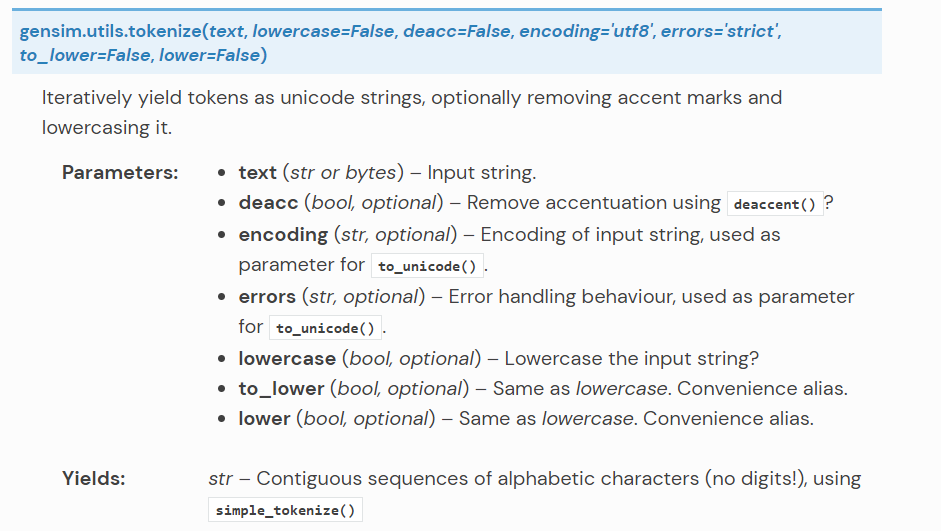

Также мы можем применить tokenize() из Gensim, который встроен в simple_proprocess

## Удаление стоп-слов

Попробуем три опции: 

- загрузка стоп-слов, которые предоставляет NLTK
- загрузка стоп-слов, которые предоставляет Spacy
- загрузка стоп-слов, которые предоставляет Gensim

UPD: функция для добавления собственных стоп-слов

In [99]:
# сохраняем список слов NLTK в переменную

nltk_sw = stopwords.words('english')

# загрузка spacy для английского языка

en = spacy.load('en_core_web_sm')

# загрузка стоп-слов Spacy

spacy_sw = en.Defaults.stop_words

# загрузка стоп-слов из gensim

gensim_sw = STOPWORDS

def clean_sw(text, sw):
  # принимает токенизированный текст

  # чтобы удалить стоп-слова, "пробежимся" по токенизированному списку
  # если слово отсутсвует в списке стоп-слов, сохраним его в новый список
  return [x for x in text if not x in sw]

no_sw_nltk, no_sw_spacy, no_sw_gensim = [clean_sw(sentence, nltk_sw) for sentence in gensim_tokenized], \
[clean_sw(sentence, spacy_sw) for sentence in gensim_tokenized], [clean_sw(sentence, gensim_sw) for sentence in gensim_tokenized]

print(f'{Fore.RED}* Образец, очищенный от стоп-слов с помощью функции NLTK {Style.RESET_ALL}\n"{no_sw_nltk[1:4]}"\n\n \
{Fore.RED}* Образец, очищенный от стоп-слов с помощью функции Spacy {Style.RESET_ALL}\n"{no_sw_spacy[1:4]}"\n\n \
{Fore.RED}* Образец, очищенный от стоп-слов с помощью функции Gensim {Style.RESET_ALL}\n"{no_sw_gensim[1:4]}"')

* Образец, очищенный от стоп-слов с помощью функции NLTK 
"[['org', 'textbook', 'understanding', 'science', 'text'], ['text', 'used', 'non', 'commercial', 'educational', 'purposes'], ['introduction', 'geology', 'free', 'textbook', 'college', 'level', 'introductory', 'geology', 'courses', 'understanding', 'science', 'student', 'learning', 'outcomes', 'end', 'chapter', 'students', 'able', 'contrast', 'objective', 'versus', 'subjective', 'observations', 'quantitative', 'versus', 'qualitative', 'observations']]"

 * Образец, очищенный от стоп-слов с помощью функции Spacy 
"[['org', 'textbook', 'understanding', 'science', 'text'], ['text', 'non', 'commercial', 'educational', 'purposes'], ['introduction', 'geology', 'free', 'textbook', 'college', 'level', 'introductory', 'geology', 'courses', 'understanding', 'science', 'student', 'learning', 'outcomes', 'end', 'chapter', 'students', 'able', 'contrast', 'objective', 'versus', 'subjective', 'observations', 'quantitative', 'versus', 'qualitati

Нужно решить, в каком формате мы будем хранить стоп-слова, например, это может быть список в *.txt

В репозиторий добавлен список стоп-слов, который можно дополнить вручную

In [89]:
# загрузка стоп-слов

!wget https://raw.githubusercontent.com/vifirsanova/OCR_Glossary/main/stopwords.txt

new_stopwords = Path('stopwords.txt').read_text()

--2023-02-07 07:27:39--  https://raw.githubusercontent.com/vifirsanova/OCR_Glossary/main/stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41 [text/plain]
Saving to: ‘stopwords.txt.1’

stopwords.txt.1     100%[===================>]      41  --.-KB/s    in 0s      

2023-02-07 07:27:39 (1.80 MB/s) - ‘stopwords.txt.1’ saved [41/41]



In [90]:
# сырые данные нужно преобразовать в "машиночитаемый" список

new_stopwords

'commons\nedition\neducational\nfigure\ntable\n'

In [91]:
# для этого достаточно разделить список по абзацному отступу

new_stopwords = new_stopwords.split('\n')
new_stopwords

['commons', 'edition', 'educational', 'figure', 'table', '']

In [92]:
# посмотрим на типы стоп-слов в каждой из выбранных библиотек 
# можно ли пополнить эти списки?

print(
    'NLTK: ', type(stopwords.words('english')),
    '\nSpacy: ', type(spacy.load('en_core_web_sm').Defaults.stop_words),
    '\nGensim: ', type(STOPWORDS)
)

NLTK:  <class 'list'> 
Spacy:  <class 'set'> 
Gensim:  <class 'frozenset'>


In [93]:
# спиок Gensim непополняемый (ср. со списком Spacy)
# поэтому его преобразовываем к виду list или set
# set использовать логичнее
# если попадутся повторяющиеся слова, они отфильтруются

sw_list = list(STOPWORDS)
sw_set = set(STOPWORDS)

for elem in new_stopwords:
  sw_list.append(elem)

for elem in new_stopwords:
  sw_set.add(elem)

print(f"{Fore.RED}Образец дополненного списка{Style.RESET_ALL}\n", sw_list)
print(f"{Fore.RED}Образец дополненного множества{Style.RESET_ALL}\n", sw_set)

Образец дополненного списка
 ['very', 'quite', 'to', 'there', 'too', 'off', 'myself', 'if', 'due', 'via', 'per', 'alone', 'further', 'no', 'on', 'could', 'name', 'us', 'wherein', 'against', 'after', 'everything', 'from', 'cannot', 'one', 'move', 'must', 'forty', 'how', 'everyone', 'formerly', 'ours', 'around', 'ie', 'more', 'them', 'your', 'twenty', 'through', 'someone', 'con', 'nobody', 'be', 'give', 'km', 'back', 'at', 'whereby', 'doing', 'when', 'used', 'becomes', 'both', 'she', 'the', 'former', 'about', 'somehow', 'however', 'sincere', 'with', 'now', 'been', 'why', 'ltd', 'not', 'least', 'nowhere', 'therefore', 'together', 'many', 'whence', 'sometimes', 'thick', 'un', 'before', 'became', 'nine', 'our', 'although', 'keep', 'often', 'her', 'indeed', 'and', 'ever', 'thus', 'my', 'him', 'but', 'between', 'only', 'done', 'under', 'none', 'bill', 'see', 'might', 'does', 'were', 'seemed', 'otherwise', 'did', 'fifty', 'third', 'toward', 'hence', 'as', 'every', 'detail', 'a', 'side', 'five'

In [100]:
# универсальная функция для удаления стоп-слов
# принимает на вход текст, который нужно очистить, и список стоп-слов

cleaned_sw = [clean_sw(sentence, sw_set) for sentence in gensim_tokenized]
print(f"{Fore.RED}Образец корпуса, очищенного от стоп-слов{Style.RESET_ALL}\n",cleaned_sw[1:4])

Образец корпуса, очищенного от стоп-слов
 [['org', 'textbook', 'understanding', 'science', 'text'], ['text', 'non', 'commercial', 'purposes'], ['introduction', 'geology', 'free', 'textbook', 'college', 'level', 'introductory', 'geology', 'courses', 'understanding', 'science', 'student', 'learning', 'outcomes', 'end', 'chapter', 'students', 'able', 'contrast', 'objective', 'versus', 'subjective', 'observations', 'quantitative', 'versus', 'qualitative', 'observations']]


## UPD: Би- и триграммные модели Gensim

**sentences**

- Обработанный текст будем использовать в качестве обучающего корпуса 

- Корпус должен быть представлен в виде списка, то есть набора предложений

- Каждое предложение должно быть представлено в виде набора токенов (слов)

**min_count**

- Минимальная частота встречаемости слов и биграмм, которую модель учитывает при поиске коллокаций, по умолчанию 5

**threshold**

- Порог формирования коллокаций (чем выше его значение, тем меньше фраз получим), по умолчанию равен 10
- Слова A и B становятся биграммами, если 
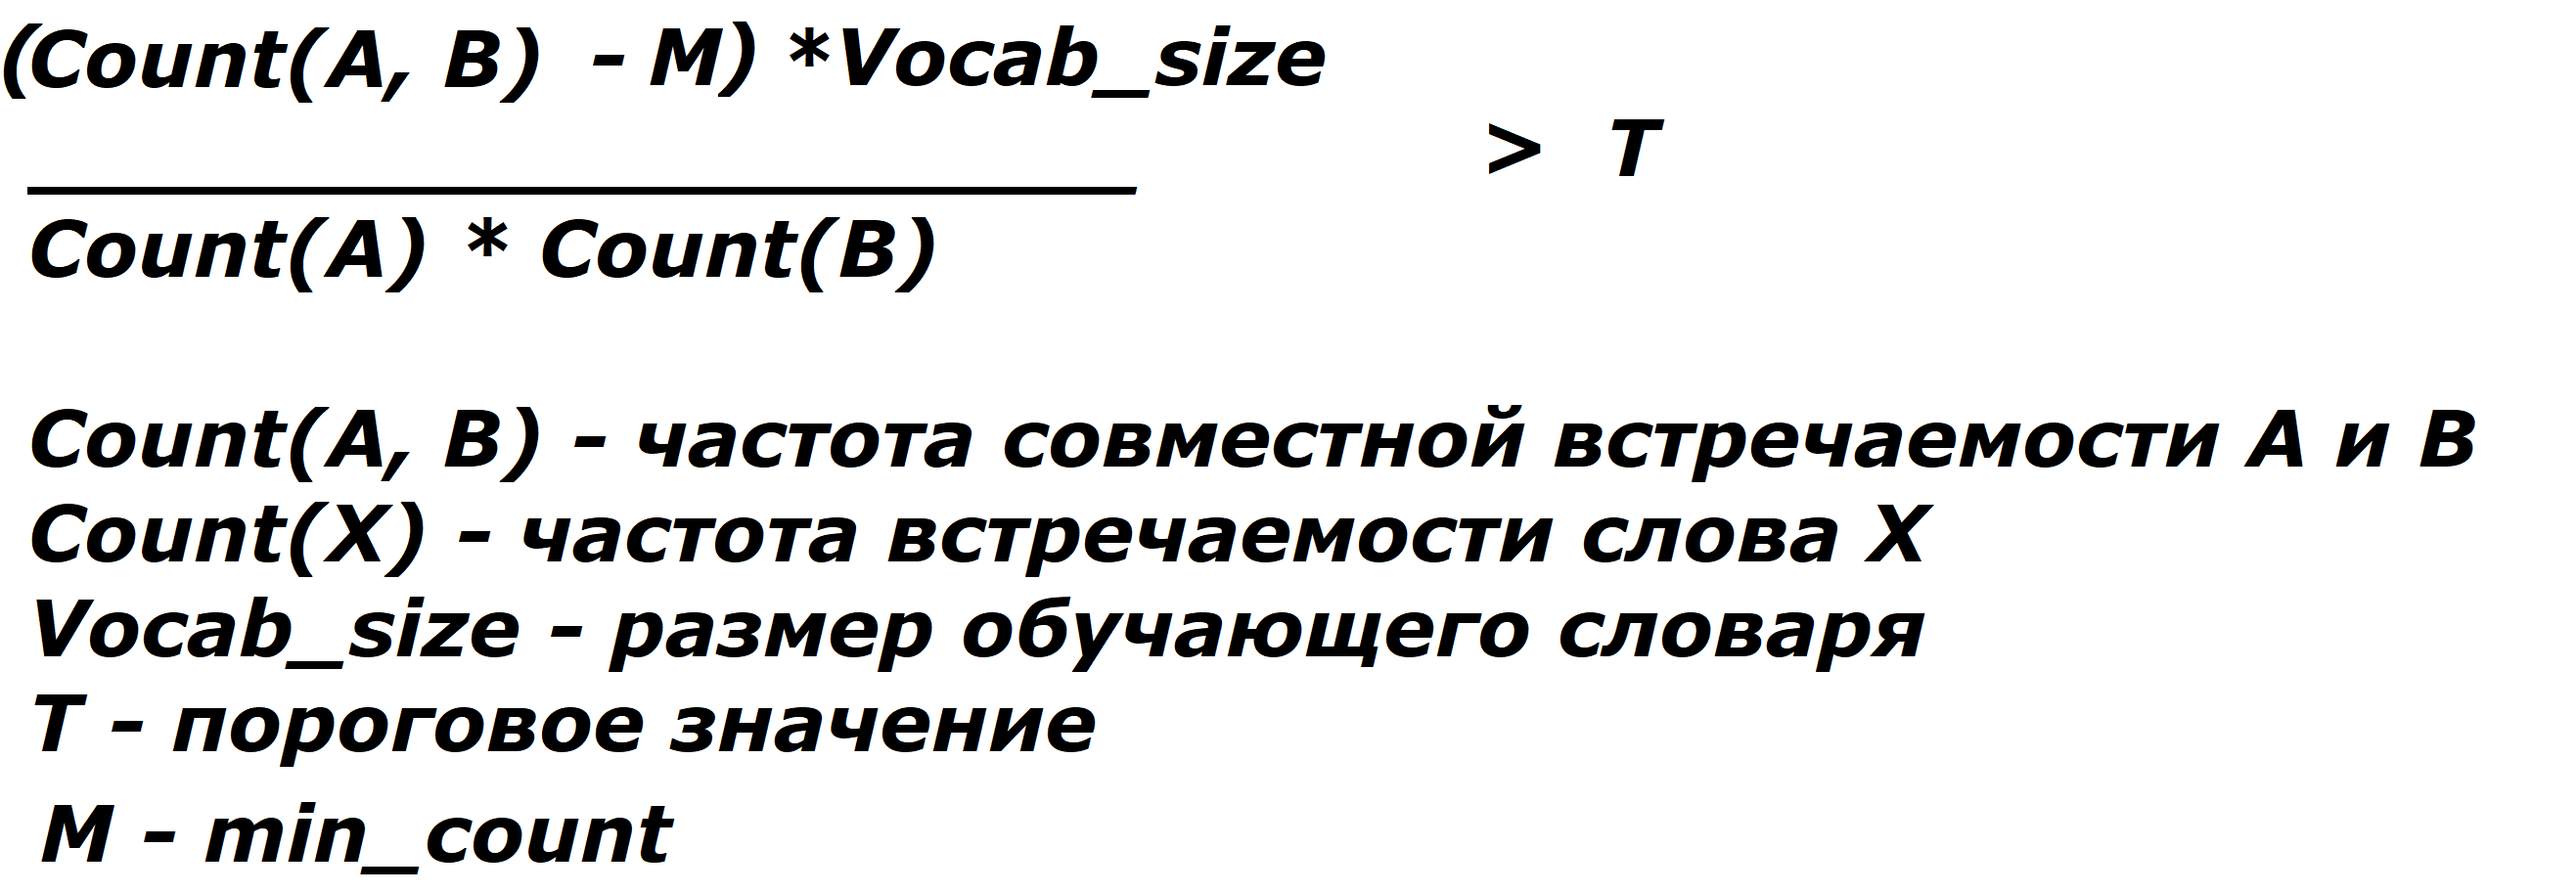

Vocab_size - количество уникальных токенов в предложении, словарем здесь мы называем список уникальных слов

Подробнее: глава 4 статьи [Distributed Representations of Words and Phrases
and their Compositionality](https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf) (Mikolov et al., 2013)

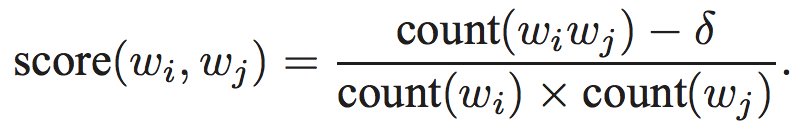

* `score(w_i, w_j)` - оценка совместной встречаемости любых двух слов 
* Чтобы посчитать триграммы, `w_i` должна быть биграммой, а `w_j` - отдельным словом и т.д.

[Исходный код](https://github.com/RaRe-Technologies/gensim/blob/bdcd1003dcaa2f10ae4c81755207d87d9926add9/gensim/models/phrases.py)

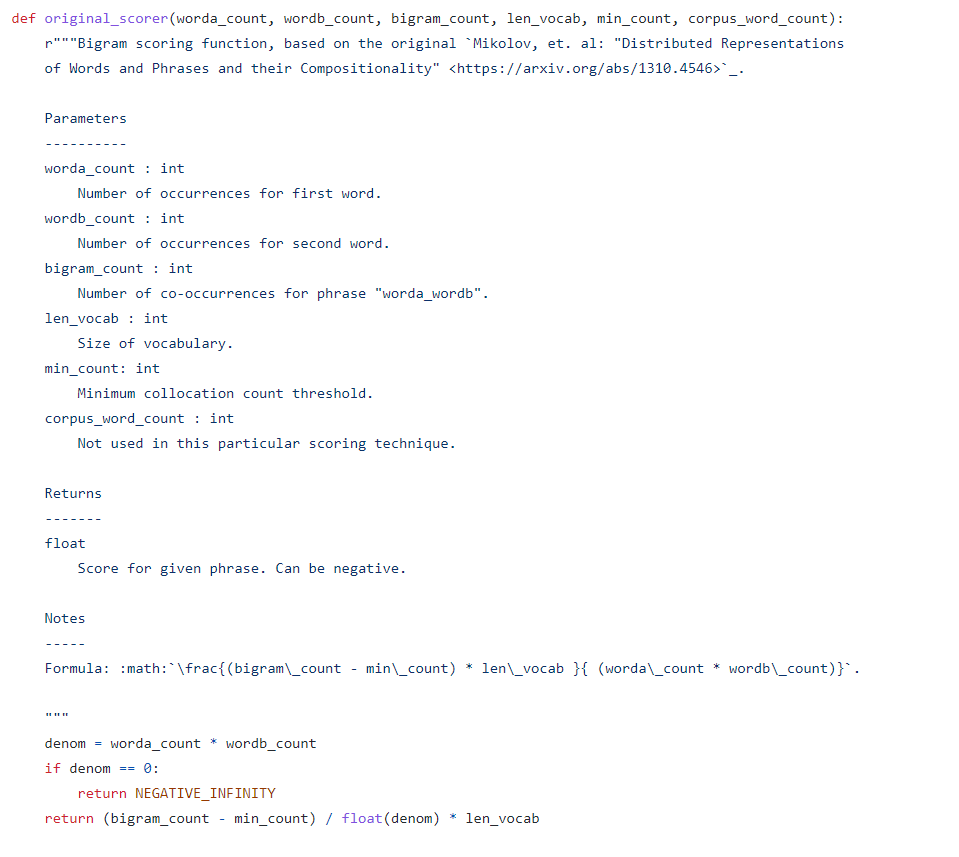

**connector_words**

- Список слов, которые могут быть включены в n-грамму
- N-грамма не может начинаться с коннектора
- Список включает артикли, предлоги, союзы
- Помогает формировать коллокации типа `bank_of_america`, `eye_of_the_beholder`
- Пример коннекторов для немецкого языка: `der, die, das`


**другие параметры**

* max_vocab_size – максимальный размер словаря
  * помогает экономить память устройства
  * опция актуальна для работы с более крупными датасетами 
  * настраивается в зависимости от доступного объема оперативной памяти устройства
  * по умолчанию - 40 миллионов слов, требует ~3.6 ГБ (Google Colab предоставляет ~13 ГБ)
  * актуально для запуска программы на собственном устройстве
   
* delimiter – тип разделителя для n-грамм, по умолчанию используется `_`

* scoring – тип / формула подсчета совместной встречаемости
  * gensim предлагает два варианта
    * default - мы разобрали выше
    * npmi - основан на алгоритме из статьи [Normalized (Pointwise) Mutual Information in Collocation Extraction](https://svn.spraakdata.gu.se/repos/gerlof/pub/www/Docs/npmi-pfd.pdf) (Gerlof Bouma, 2009)

    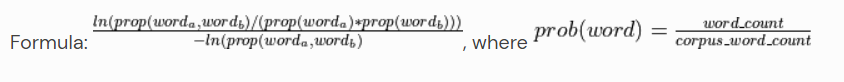

**Особенности NPMI**

* Пороговое значение между -1 и 1, т.к. используется вероятностный подход
* Дольше рассчитывается
* Лучше находит общеупотребительные коллокации (гипотетически, будет лучше работать с открытой предметной областью)

**Собственная функция**

Также для скоринга можно прописать собственную функцию для подсчета совместной встречаемости со следующими параметрами (модель должна просчитывать эти параметры):

* worda_count - частота встречаемости слова А
* wordb_count - частота встречаемости слова B
* bigram_count - частота встречаемости биграмм
* len_vocab - количество уникальных токенов в предложении 
* min_count - параметр min_count для класса Phrases
* corpus_word_count - всего токенов в предложении, включая повторяющиеся токены

**Образец работы биграммной модели**

In [125]:
phrase_model = Phrases(sentences=cleaned_sw, min_count=1, threshold=1, connector_words=ENGLISH_CONNECTOR_WORDS, scoring='default')
phrase_model_npmi = Phrases(sentences=cleaned_sw, min_count=1, threshold=0.5, connector_words=ENGLISH_CONNECTOR_WORDS, scoring='npmi')

In [124]:
phrase_model[cleaned_sw[4]]

['identify',
 'pseudoscience',
 'based',
 'lack',
 'falsifiability',
 'contrast',
 'methods',
 'aristotle',
 'galileo',
 'natural_environment']

In [120]:
phrase_model_npmi[cleaned_sw[4]]

['identify',
 'pseudoscience',
 'based',
 'lack_falsifiability',
 'contrast',
 'methods',
 'aristotle_galileo',
 'natural',
 'environment']

**Образец работы n-граммной модели**

1. Создаем биграммный корпус 

In [128]:
bigram_corpus = [phrase_model[sentence] for sentence in cleaned_sw]
print(f"{Fore.RED}Образец выдач биграммной модели{Style.RESET_ALL}\n {bigram_corpus[2]} \n {bigram_corpus[3]} \n {bigram_corpus[4]}")

Образец выдач биграммной модели
 ['text', 'non_commercial', 'purposes'] 
 ['introduction_geology', 'free', 'textbook', 'college', 'level', 'introductory_geology', 'courses', 'understanding_science', 'student', 'learning_outcomes', 'end_chapter', 'students_able', 'contrast', 'objective', 'versus', 'subjective', 'observations', 'quantitative', 'versus', 'qualitative_observations'] 
 ['identify', 'pseudoscience', 'based', 'lack', 'falsifiability', 'contrast', 'methods', 'aristotle', 'galileo', 'natural_environment']


2. Используем биграммный корпус, чтобы обучить новую модель

In [178]:
trigram_model = Phrases(sentences=bigram_corpus, min_count=1, threshold=1, connector_words=ENGLISH_CONNECTOR_WORDS, scoring='default')
print(f"{Fore.RED}Образец выдач n-граммной модели{Style.RESET_ALL}\n {trigram_model[bigram_corpus[2]]} \n {trigram_model[bigram_corpus[182]]} \n {trigram_model[bigram_corpus[-11]]}")

Образец выдач n-граммной модели
 ['text', 'non_commercial_purposes'] 
 ['geologists_study', 'natural_hazards', 'created', 'geologic_processes'] 
 ['ministry_environment_observation_website']


Для выдач модели мы также используем в качестве входных данных корпус биграмм

Получим полный список n-грамм 

In [189]:
ngrams = [trigram_model[text] for text in bigram_corpus]

In [190]:
ngrams[182]

['geologists_study', 'natural_hazards', 'created', 'geologic_processes']

# Term Frequency

In [229]:
# создание словаря с помощью gensim.corpora
id2word = Dictionary(ngrams)

print(id2word)

# сортировка элементов, 
# добавляем все, что обнаружили, в общий список
# чтобы избежать повторов, мы также лемматизируем выдачи
# с помощью NLTK

lemmatizer = nltk.stem.WordNetLemmatizer()

all_ngrams = []
for elem in ngrams:
  for x in elem:
    # в новый список мы добавляем уже лемматизированное слово
    all_ngrams.append(lemmatizer.lemmatize(x))

# TF: подсчет частоты встречаемости элементов в корпусе

corpus = id2word.doc2bow(all_ngrams)
tf = [(id2word[id], freq) for id, freq in corpus]

print(f"{Fore.RED}Образец подсчета Term Frequency:{Style.RESET_ALL}\n", tf[:10])

Dictionary<31192 unique tokens: ['source', 'org', 'text', 'textbook', 'understanding_science']...>
Образец подсчета Term Frequency:
 [('source', 82), ('org', 10), ('text', 28), ('textbook', 14), ('understanding_science', 2), ('non_commercial_purposes', 3), ('college', 3), ('contrast', 20), ('end_chapter_students_able', 1), ('free', 15)]


# Визуализация результата

In [230]:
# создаем DataFrame с результатами работы 
df = pd.DataFrame(tf, columns=['item', 'frequency']).sort_values(by=['frequency'], ascending=False)
df.head()

,item,frequency
1168,rock,633
803,water,401
2889,mineral,378
874,area,350
261,form,348


In [231]:
# сохраянем в Excel

df.to_excel("output.xlsx")  